In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import seaborn as sns

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [3]:
songs_dataset = pd.read_csv("data/Most Streamed Spotify Songs 2024.csv", encoding = 'ISO-8859-1')

In [4]:
songs_dataset

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [5]:
# checking the columns' names
songs_dataset.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [6]:
# Renaming the columns

old_names = ['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track']

new_names = {}
new_names = {}
for old_name in old_names:
    new_name = old_name.lower()
    while " " in new_name:
        new_name = new_name.replace(" ", "_")
    new_names[old_name] = new_name


songs_dataset_renamed = songs_dataset.rename(columns=new_names)
songs_dataset_renamed

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [7]:
# checking the types of data
songs_dataset_renamed.dtypes

track                          object
album_name                     object
artist                         object
release_date                   object
isrc                           object
all_time_rank                  object
track_score                   float64
spotify_streams                object
spotify_playlist_count         object
spotify_playlist_reach         object
spotify_popularity            float64
youtube_views                  object
youtube_likes                  object
tiktok_posts                   object
tiktok_likes                   object
tiktok_views                   object
youtube_playlist_reach         object
apple_music_playlist_count    float64
airplay_spins                  object
siriusxm_spins                 object
deezer_playlist_count         float64
deezer_playlist_reach          object
amazon_playlist_count         float64
pandora_streams                object
pandora_track_stations         object
soundcloud_streams             object
shazam_count

In [8]:
# convert release_date from object to datetime
songs_dataset_renamed.release_date = pd.to_datetime(songs_dataset_renamed.release_date)

In [9]:
# convert all_time_rank from object to int
songs_dataset_renamed.all_time_rank = songs_dataset_renamed.all_time_rank.str.replace(',', '')
songs_dataset_renamed.all_time_rank = songs_dataset_renamed.all_time_rank.astype(int)

In [10]:
int_variables = ['spotify_streams', 'spotify_playlist_count', 'spotify_playlist_reach']

In [11]:
for name in int_variables:
    songs_dataset_renamed[name] = songs_dataset_renamed[name].str.replace(',', '')
    songs_dataset_renamed[name] = songs_dataset_renamed[name].astype('Int64')

In [12]:
songs_dataset_renamed.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

In [13]:
songs_dataset_renamed.siriusxm_spins.value_counts(dropna = False)

siriusxm_spins
NaN      2123
1          54
2          52
4          45
3          43
         ... 
1,012       1
274         1
1,150       1
520         1
837         1
Name: count, Length: 690, dtype: int64

In [14]:
# tidal_popularity contains only NaN values, so it is deleted from the dataset
del songs_dataset_renamed["tidal_popularity"]

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [15]:
# checking the artists with most songs in the dataset
artists_dataset = songs_dataset_renamed.artist.value_counts()
artists_dataset.head()

artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

<span style="color: green;">The artist with the most songs in the dataset are Drake, Taylor Swift, Bad Bunny, Karol G, and the Weekend (whoever they are....)</span>

In [16]:
# checking the artists with most non-explicit songs in the dataset 
non_explicit_songs_dataset = songs_dataset_renamed[songs_dataset_renamed.explicit_track != 1]

non_explicit_artists = non_explicit_songs_dataset.artist.value_counts()
non_explicit_artists.head()

artist
Taylor Swift     50
Billie Eilish    25
Bad Bunny        18
KAROL G          18
Morgan Wallen    17
Name: count, dtype: int64

<span style="color: green;">The artist with the most songs in the dataset are Taylor Swift, Billie Eilish, Bad Bunny, Karol G, and Morgan Wallen (three of them kept their places in top 5)</span>

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [17]:
# grouping by "artist" and summing the "spotify_streams" for each artist
artist_by_spotify_streams = songs_dataset_renamed.groupby('artist')['spotify_streams'].sum()

#sorting the artist by the summed spotify streams
sorted_artists_by_spotify_streams = artist_by_spotify_streams.sort_values(ascending = False)

# top 5 artists
sorted_artists_by_spotify_streams.head()


artist
Bad Bunny       37054834425
The Weeknd      36948540278
Drake           34962157577
Taylor Swift    34470771165
Post Malone     26137472958
Name: spotify_streams, dtype: Int64

<span style="color: green;">The most streamed artists in Spotify are Bad Bunny, The Weekend, Drake, Taylor Swift, and Post Malone</span>

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [18]:
# extracting the year of realease of each track in a new column
songs_dataset_renamed['year_of_release'] = songs_dataset_renamed['release_date'].dt.year

In [19]:
# checking the number of tracks per year
songs_per_year = songs_dataset_renamed.groupby('year_of_release').size()

songs_per_year

year_of_release
1987       1
1991       1
1994       1
1998       1
1999       1
2000       2
2001       1
2002       5
2003       3
2004       5
2005       5
2006       3
2007       5
2008      11
2009      15
2010      27
2011      51
2012      47
2013      55
2014      70
2015      96
2016     123
2017     213
2018     249
2019     296
2020     360
2021     408
2022     694
2023    1158
2024     693
dtype: int64

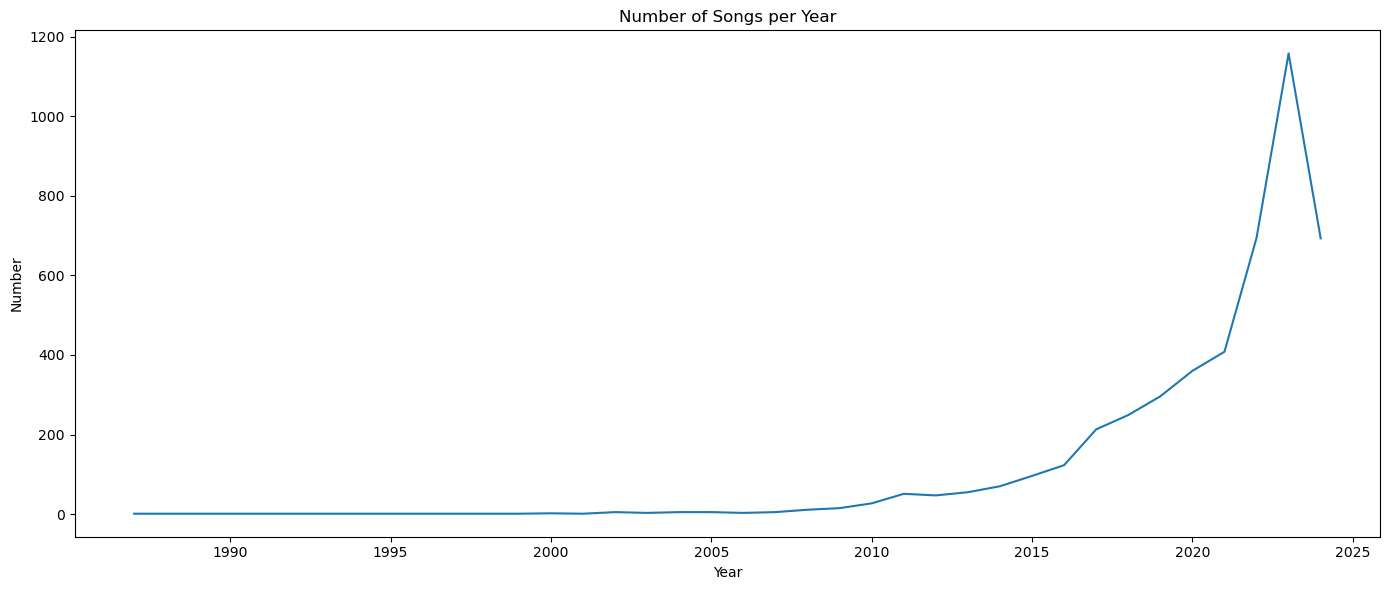

In [20]:
# Plotting the number of tracks per year
plt.figure(figsize=(14, 6))
plt.plot(songs_per_year)
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number')

plt.tight_layout()
plt.show()

In [21]:
songs_dataset_renamed.release_date.max()

Timestamp('2024-06-14 00:00:00')

<span style="color: green;">The number of tracks drops in 2024, but the dataset includes only data for the first half of the year. It could be expected that the number of tracks will be higher compared to 2023 when the full year data are available.</span>

In [22]:
# extracting the month of realease of each track in a new column
songs_dataset_renamed['month_of_release'] = songs_dataset_renamed['release_date'].dt.month

In [23]:
# checking the number of tracks per month
songs_per_month = songs_dataset_renamed.groupby('month_of_release').size()
songs_per_month

month_of_release
1     503
2     371
3     430
4     420
5     511
6     395
7     321
8     315
9     328
10    384
11    350
12    272
dtype: int64

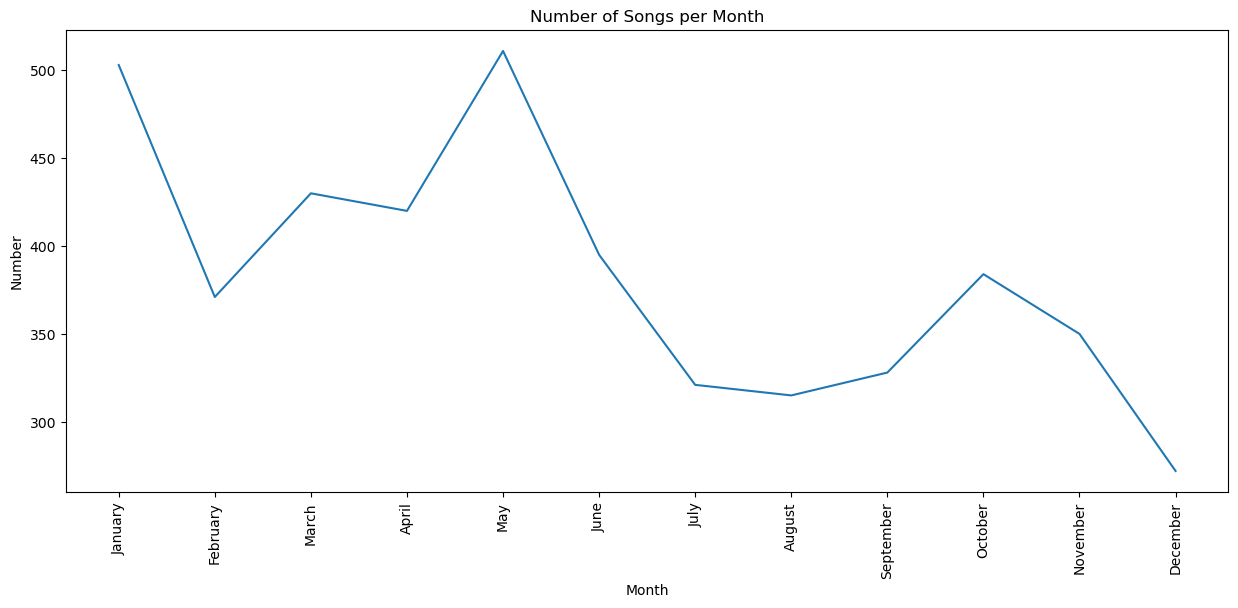

In [24]:
# converting month numbers to month names
months = [calendar.month_name[i] for i in range(1, 13)]

# Plotting the number of tracks per year
plt.figure(figsize=(15, 6))
plt.plot(songs_per_month)
plt.title('Number of Songs per Month')
plt.xlabel('Month')
plt.ylabel('Number')

plt.xticks(range(1, 13), labels=months)
plt.xticks(rotation=90)

plt.show()

<span style="color: green">The greatest number of songs have been released in May, closely followed by January. This could be a result of the strategy of music producers. </span>
<span style="color: green">In the first case (May), a possible explanation could be the forthcoming summer.</span>
<span style="color: green">In the second case (January), the released track would accumulate views, streams and other statistics through the whole year.</span>

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

<Axes: >

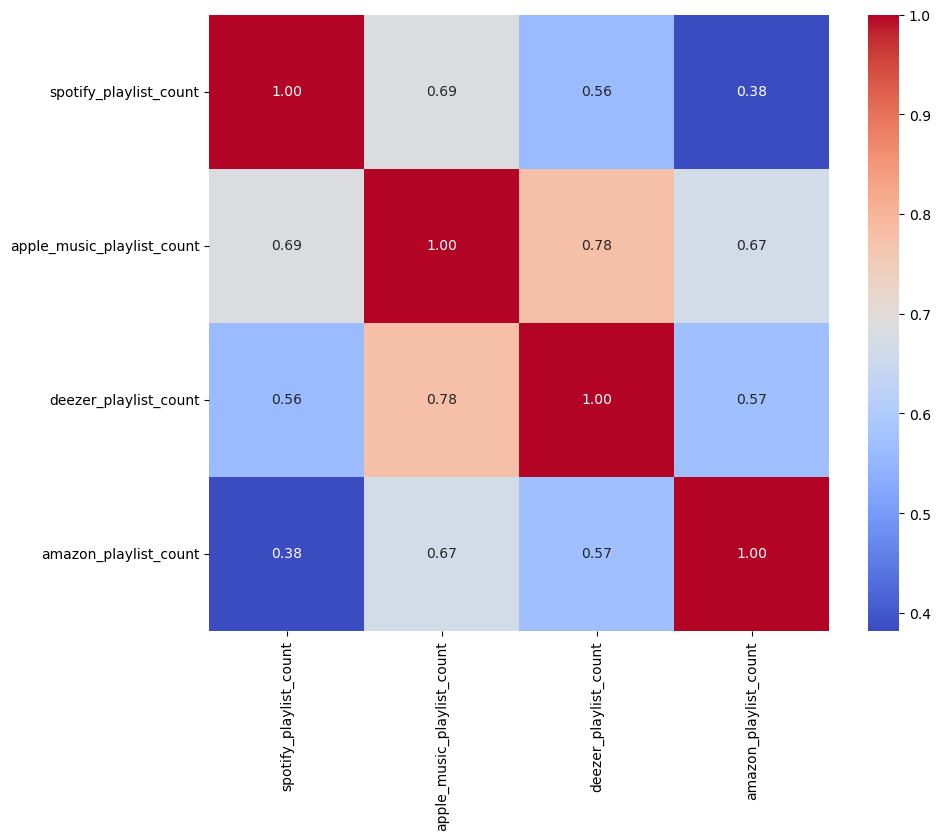

In [25]:
playlists = ['spotify_playlist_count', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']

correlation_matrix = songs_dataset_renamed[playlists].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, annot_kws={"va": "center"}, fmt = ".2f", cbar = True, cmap = "coolwarm")

<Axes: >

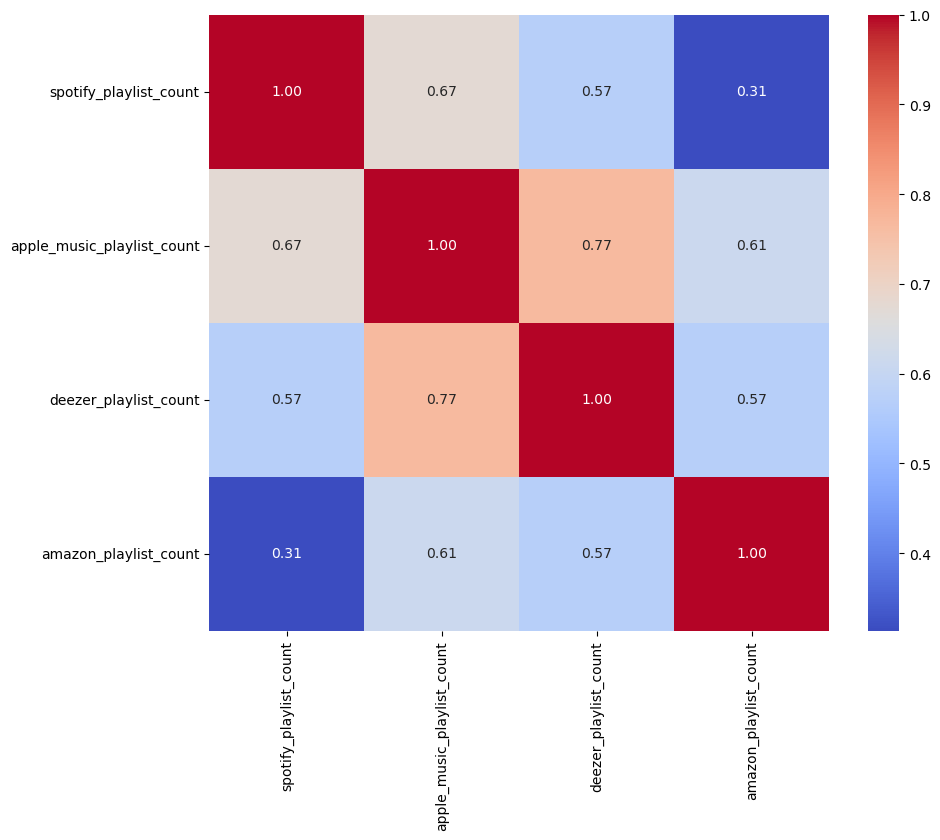

In [26]:
correlation_matrix = songs_dataset_renamed[playlists].corr("spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, annot_kws={"va": "center"}, fmt = ".2f", cbar = True, cmap = "coolwarm")

<span style="color: green">The results of the Pearson and Spearman correlations are similar.</span>
<span style="color: green">The strongest positive correlation was observed between the sount of songs on Deezer and Apple Music, </span>
<span style="color: green">while the weakest correlation was observed between the songs added to Spotify and Amazon.</span>
<span style="color: green">Maybe Deezer and Apple Music have more common users compared to Spotify and Amazon.</span>

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

In [27]:
# checking youtube min ana max views
yt_views = pd.to_numeric(songs_dataset_renamed['youtube_views'].dropna().str.replace(',', ''), errors='coerce')
yt_views.min(), yt_views.max()

(913, 16322756555)

In [28]:
# checking youtube min ana max likes
yt_likes = pd.to_numeric(songs_dataset_renamed['youtube_likes'].dropna().str.replace(',', ''), errors='coerce')
yt_likes.min(), yt_likes.max()

(25, 62311179)

In [29]:
# extracting the youtube data to a new dataframe
youtube_data = pd.DataFrame({"yt_views": yt_views, "yt_likes": yt_likes})
youtube_data

,yt_views,yt_likes
0,84274754,1713126.0
1,116347040,3486739.0
2,122599116,2228730.0
3,1096100899,10629796.0
4,77373957,3670188.0
...,...,...
4595,149247747,1397590.0
4596,943920245,5347766.0
4597,201027333,1081402.0
4598,1118595159,3868828.0


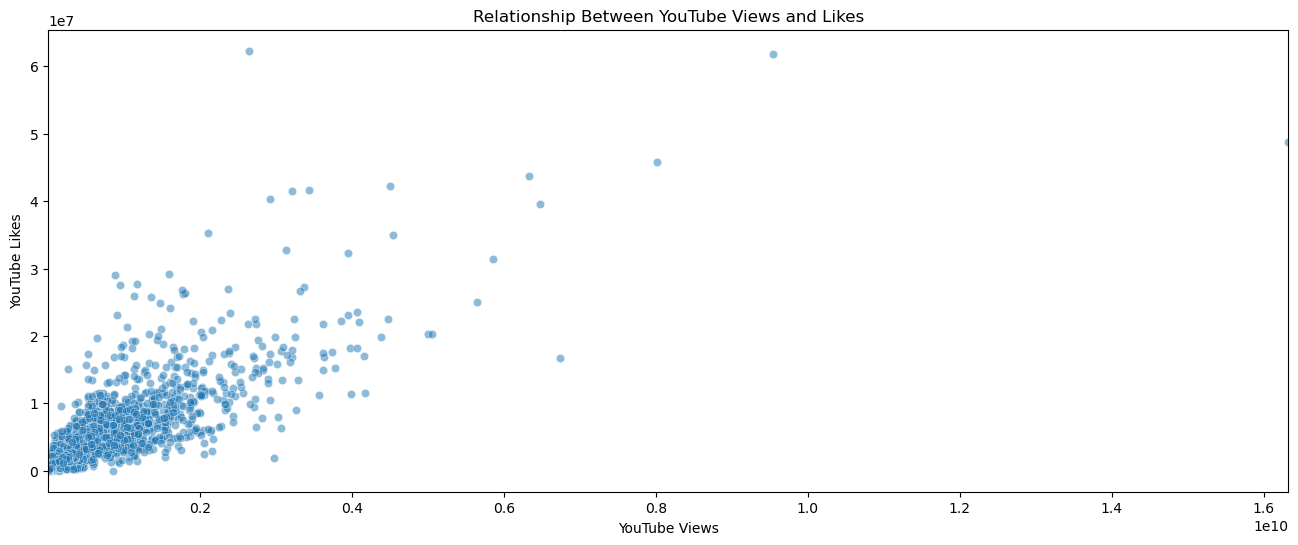

In [30]:
# Scatter Plot with adjusted scales
plt.figure(figsize=(16, 6))
sns.scatterplot(
    x='yt_views',
    y='yt_likes',
    data=youtube_data,
    alpha=0.5
)
plt.xlabel('YouTube Views')
plt.ylabel('YouTube Likes')
plt.title('Relationship Between YouTube Views and Likes')

# Set x-axis limits in millions
plt.xlim(youtube_data['yt_views'].min(), youtube_data['yt_views'].max())

plt.show()

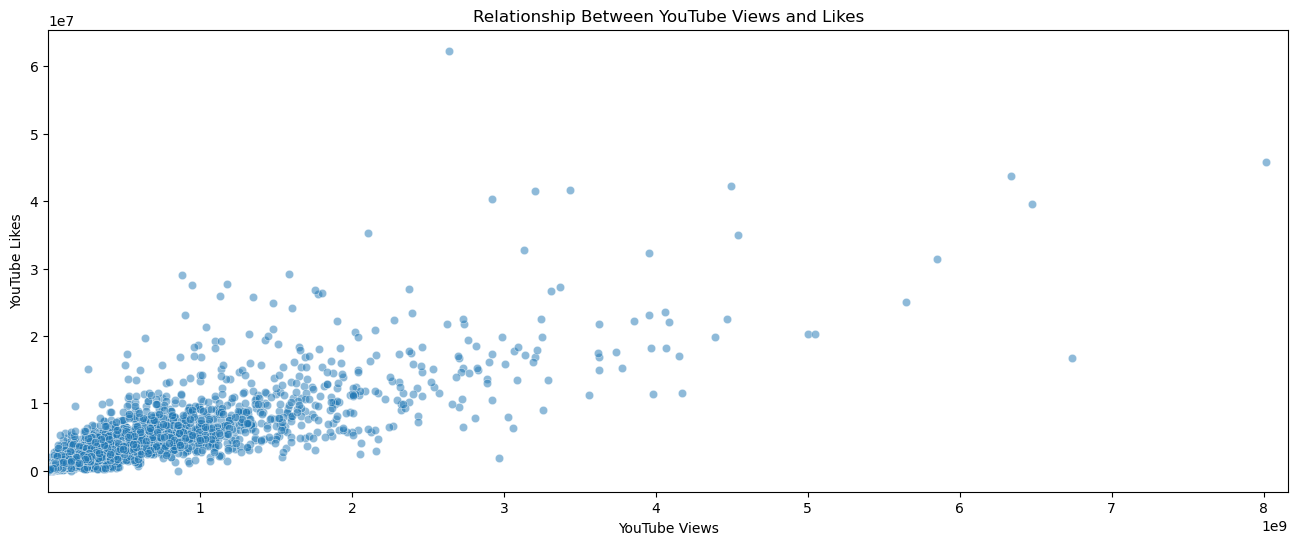

In [31]:
# Scatter Plot with restricted max value of the x-axis to half of the max youtube views in order to see more clearly the trend
plt.figure(figsize=(16, 6))
sns.scatterplot(
    x='yt_views',
    y='yt_likes',
    data=youtube_data,
    alpha=0.5
)
plt.xlabel('YouTube Views')
plt.ylabel('YouTube Likes')
plt.title('Relationship Between YouTube Views and Likes')

# Set x-axis limits in millions
plt.xlim(youtube_data['yt_views'].min(), youtube_data['yt_views'].max() / 2)

plt.show()

<span style="color: green">The simple conclusion is "The more views, the more likes"</span>

In [32]:
# adding a new column 'youtube_views_to_likes_ratio' 
youtube_data['views_to_likes_ratio'] = youtube_data['yt_views'] / youtube_data['yt_likes']

# calculating the mean ratio
mean_ratio = youtube_data.views_to_likes_ratio.mean()
mean_ratio

169.11611317907185

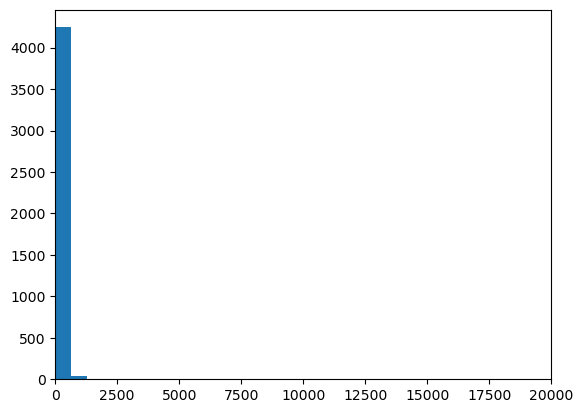

In [33]:
# histogram of the 'views_to_likes_ratio' distribution 
plt.hist(youtube_data.views_to_likes_ratio, bins = 200)

plt.xlim(0, 20000)
plt.show()

<span style="color: green">The distribution of the ratio is very skewed</span>

In [34]:
# ckecking the min and max values of the ratio
youtube_data.views_to_likes_ratio.min(), youtube_data.views_to_likes_ratio.max()

(6.929675782696278, 129287.78977616454)

In [35]:
# cleaning the data and restring them to 90% of the max_value
cleaned_ratio = youtube_data.views_to_likes_ratio[youtube_data.views_to_likes_ratio < (youtube_data.views_to_likes_ratio.max() * 0.9)]

In [36]:
cleaned_ratio.max()

6510.313659805175

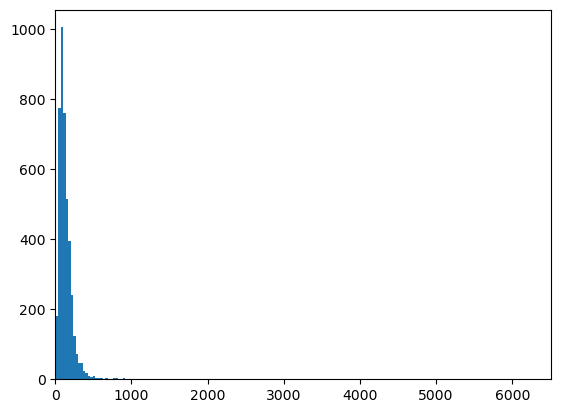

In [37]:
# histogram of the 'views_to_likes_ratio' distribution 
plt.hist(cleaned_ratio, bins = 200)

plt.xlim(0, cleaned_ratio.max())
plt.show()

In [38]:
# cleaned data to the mean + 1SD
cleaned_ratio_2 = youtube_data.views_to_likes_ratio[youtube_data.views_to_likes_ratio < (youtube_data.views_to_likes_ratio.mean() + youtube_data.views_to_likes_ratio.std())]

In [39]:
cleaned_ratio_2.max()

1749.3522610025973

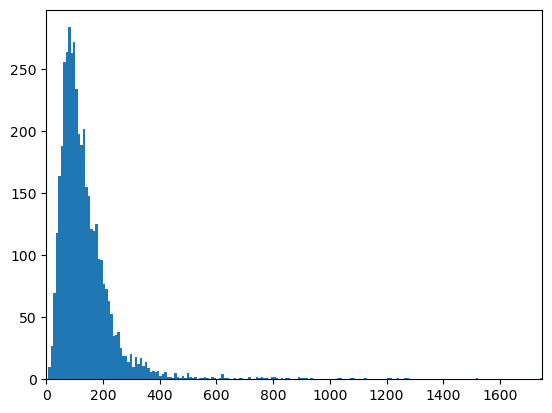

In [40]:
# histogram of the 'views_to_likes_ratio' distribution 
plt.hist(cleaned_ratio_2, bins = 200)

plt.xlim(0, cleaned_ratio_2.max())
plt.show()

In [41]:
youtube_data.views_to_likes_ratio.size, youtube_data.views_to_likes_ratio[youtube_data.views_to_likes_ratio < 100].size, youtube_data.views_to_likes_ratio[youtube_data.views_to_likes_ratio > 100].size

(4292, 1824, 2461)

<span style="color: green">The distribution of the ratio shows that, as expected, the views are always greater than the likes. The mean ratio of 169 shows that on average, there is one like per 169 views. </span>
<span style="color: green">The higher values of the ratio indicate that a song was viewed a lot, but not liked at all. </span>

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

In [42]:
songs_dataset_renamed['tiktok_views'] = songs_dataset_renamed.tiktok_views.str.replace(",", "").astype(float)

In [43]:
# summing the amount of TikTok views per year (for all years)
tiktok_views_per_year_all_years = songs_dataset_renamed.groupby('year_of_release')['tiktok_views'].sum()

tiktok_views_per_year_all_years

year_of_release
1987    6.732824e+08
1991    7.202839e+08
1994    1.596313e+10
1998    8.037196e+08
1999    2.260081e+08
2000    1.500549e+09
2001    1.670324e+08
2002    1.102066e+09
2003    2.791915e+09
2004    2.262405e+09
2005    2.223954e+11
2006    2.633024e+09
2007    4.439372e+09
2008    1.023595e+10
2009    9.018975e+09
2010    2.205043e+10
2011    2.735425e+11
2012    2.448542e+10
2013    6.667524e+10
2014    5.564570e+10
2015    7.070100e+10
2016    7.833032e+10
2017    1.743629e+11
2018    2.676612e+11
2019    3.942107e+11
2020    5.331919e+11
2021    6.311775e+11
2022    8.329750e+11
2023    4.548162e+11
2024    4.747097e+10
Name: tiktok_views, dtype: float64

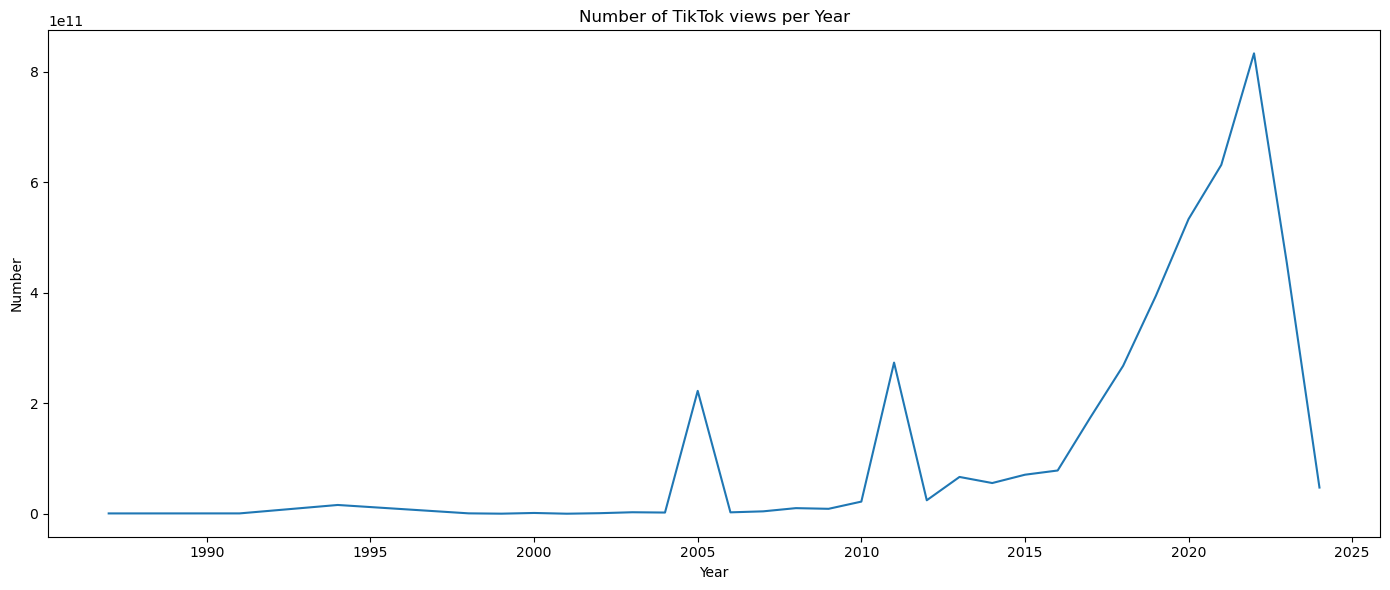

In [44]:
# Plotting the number of TikTok views per year (for all years)
plt.figure(figsize=(14, 6))
plt.plot(tiktok_views_per_year_all_years)
plt.title('Number of TikTok views per Year')
plt.xlabel('Year')
plt.ylabel('Number')

plt.tight_layout()
plt.show()

<span style="color: green">The plot shows that there were peaks in 2005, 2011 and 2022. However, it seems incorrect since it includes views of songs when TikTok did not exist.</span>
<span style="color: green">This result could be due to the views of songs that have been released in years before 2016.</span>
<span style="color: green">It is more correct to present the data for the period after the appearance of TikTok</span>

In [45]:
# summing the amount of TikTok views per year (from 2016 up to now)
tiktok_views_per_year = songs_dataset_renamed[songs_dataset_renamed.year_of_release > 2015].groupby('year_of_release')['tiktok_views'].sum()

tiktok_views_per_year

year_of_release
2016    7.833032e+10
2017    1.743629e+11
2018    2.676612e+11
2019    3.942107e+11
2020    5.331919e+11
2021    6.311775e+11
2022    8.329750e+11
2023    4.548162e+11
2024    4.747097e+10
Name: tiktok_views, dtype: float64

In [46]:
# checking the min and max values
tiktok_views_per_year.min(), tiktok_views_per_year.max()

(47470965442.0, 832975012888.0)

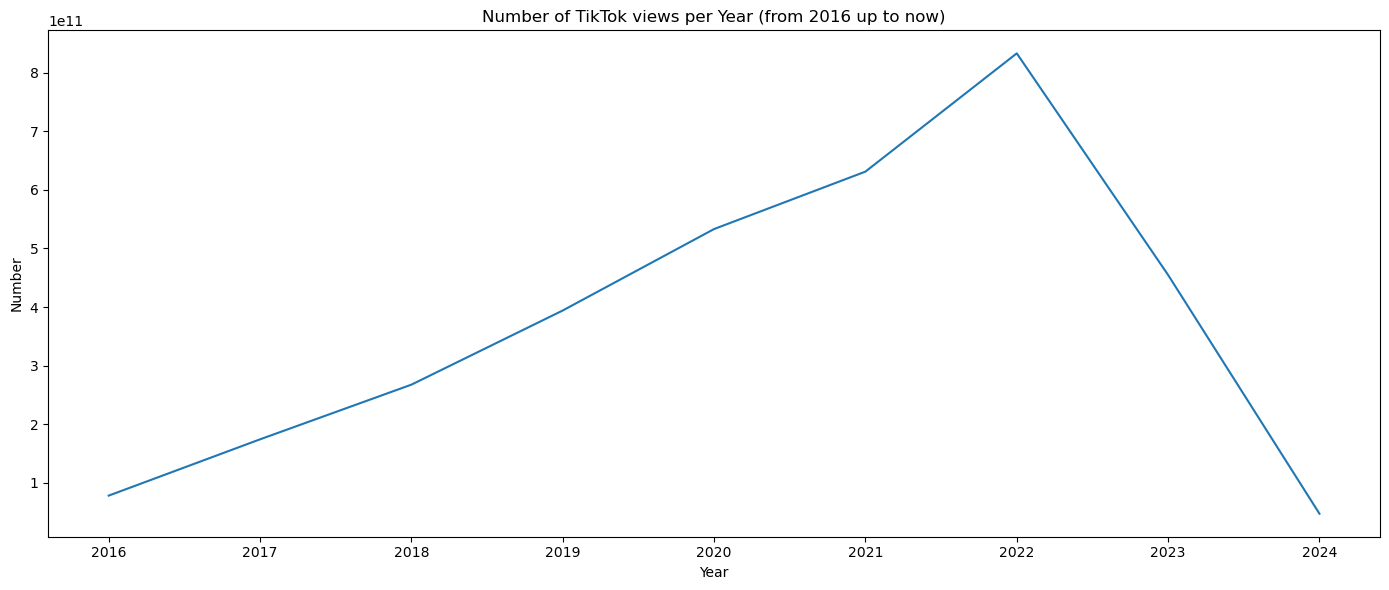

In [47]:
# Plotting the number of TikTok views per year
plt.figure(figsize=(14, 6))
plt.plot(tiktok_views_per_year)
plt.title('Number of TikTok views per Year (from 2016 up to now)')
plt.xlabel('Year')
plt.ylabel('Number')

plt.tight_layout()
plt.show()

<span style="color: green">The greatest peak is observed in 2022 with 832975012888 views.</span>

In [48]:
# extracting the song with the most TikTok views per year
songs_with_max_tiktok_views_per_year = songs_dataset_renamed.loc[
    songs_dataset_renamed.groupby('year_of_release')['tiktok_views'].idxmax()
]

songs_max_tiktok_views_per_year = songs_with_max_tiktok_views_per_year[['year_of_release', 'track', 'artist', 'tiktok_views']]
songs_max_tiktok_views_per_year = songs_max_tiktok_views_per_year.reset_index(drop = True)
songs_max_tiktok_views_per_year

,year_of_release,track,artist,tiktok_views
0,1987,Sweet Child O' Mine,Guns N' Roses,6.732824e+08
1,1991,Smells Like Teen Spirit,Nirvana,7.202839e+08
2,1994,All I Want for Christmas Is You,Mariah Carey,1.596313e+10
3,1998,Beautiful Girls,Sean Kingston,8.037196e+08
4,1999,Californication,Red Hot Chili Peppers,2.260081e+08
5,2000,The Real Slim Shady,Eminem,7.710160e+08
6,2001,Over the Rainbow,Israel Kamakawiwo'ole,1.670324e+08
7,2002,The Scientist,Coldplay,4.814086e+08
8,2003,Seven Nation Army,The White Stripes,1.394904e+09
9,2004,Yeah! (feat. Lil Jon & Ludacris),USHER,1.599321e+09


<span style="color: green">The song with the most TikTok views in 2022 is "Aesthetic" by Tollan Kim.However, after comparing the songs with max views across the different years, it is obvious that this song is not the song with max views at all.</span>

In [49]:
# saving the information for the mean TikTok views per year

mean_tiktok_views_per_year = songs_dataset_renamed[songs_dataset_renamed.year_of_release > 2015].groupby('year_of_release')['tiktok_views'].mean()
mean_tiktok_views_per_year

year_of_release
2016    6.694899e+08
2017    8.987776e+08
2018    1.158706e+09
2019    1.345429e+09
2020    1.559041e+09
2021    1.660993e+09
2022    1.365533e+09
2023    5.133366e+08
2024    2.525051e+08
Name: tiktok_views, dtype: float64

In [50]:
# saving the information for the TikTok views of most watched songs per year
max_tiktok_views = songs_max_tiktok_views_per_year[songs_max_tiktok_views_per_year.year_of_release > 2015]['tiktok_views']

In [51]:
# merging the data of the previous two variables in one place

plot_tiktok_data = pd.merge(songs_max_tiktok_views_per_year, mean_tiktok_views_per_year, on='year_of_release')
plot_tiktok_data.rename(columns={
    'tiktok_views_x': 'song_max_views',
    'tiktok_views_y': 'mean_views'
}, inplace=True)
plot_tiktok_data

,year_of_release,track,artist,song_max_views,mean_views
0,2016,Unstoppable,Sia,1.480889e+10,6.694899e+08
1,2017,Infinity,Jaymes Young,2.224110e+10,8.987776e+08
2,2018,Funny Song,Cavendish Music,3.837364e+10,1.158706e+09
3,2019,Oh No,Kreepa,6.108856e+10,1.345429e+09
4,2020,Spongebob,Dante9k,3.335940e+10,1.559041e+09
5,2021,STAY (with Justin Bieber),The Kid LAROI,2.371238e+10,1.660993e+09
6,2022,Aesthetic,Tollan Kim,3.387079e+10,1.365533e+09
7,2023,Flowers,Miley Cyrus,1.460373e+10,5.133366e+08
8,2024,TEXAS HOLD 'EM,Beyoncï¿,6.518604e+09,2.525051e+08


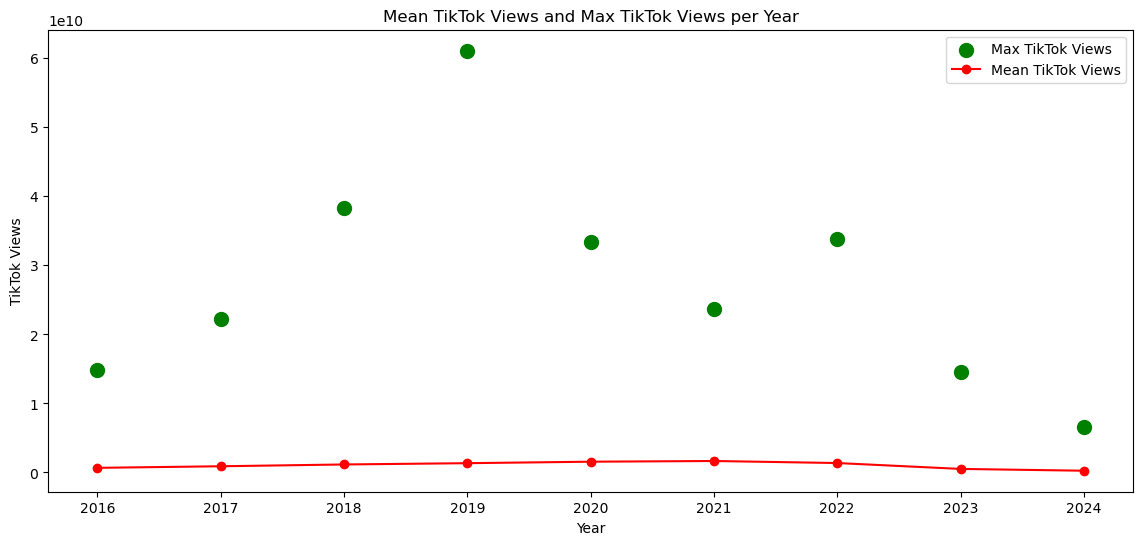

In [52]:
# Plotting the mean and max TikTok views

plt.figure(figsize=(14, 6))

# Ploting max views for each song
plt.scatter(plot_tiktok_data['year_of_release'], plot_tiktok_data['song_max_views'], color='green', label='Max TikTok Views', s=100)

# Plotting mean views per year
plt.plot(plot_tiktok_data['year_of_release'], plot_tiktok_data['mean_views'], color='red', marker='o', linestyle='-', label='Mean TikTok Views')


plt.xlabel('Year')
plt.ylabel('TikTok Views')
plt.title('Mean TikTok Views and Max TikTok Views per Year')
plt.legend()

plt.show()

<span style="color: green">The song with the most views above the average number of TikTok views was registered in 2019. The song is "Oh No" by Kreepa.</span>

<span style="color: green">While the mean values are aproximately similar, the views of the songs with the most TikTok views vary in a rather large range.</span>

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.